# Principal Component Analysis with Cancer Data

In [223]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [224]:
df = pd.read_csv("C:\\Ishan\\Greatlearning\\Labs\\5. 1 Nov\\breast-cancer-wisconsin-data.csv")

In [225]:
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [226]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [228]:
df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [229]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [230]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df[pd.to_numeric(df['Bare Nuclei'], errors='coerce').isnull()].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [231]:
df[pd.to_numeric(df['Bare Nuclei'], errors='coerce').isnull()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


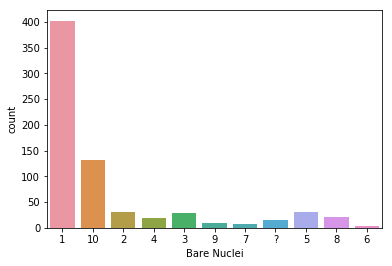

In [232]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
import seaborn as sns
sns.countplot(x=df["Bare Nuclei"]);

In [233]:
## will replce the ? value by 1 as it is there in most of the rows
df.replace(to_replace ="?", value =1,inplace=True) 

In [234]:
#checking the replace function worked correctly or not
df[pd.to_numeric(df['Bare Nuclei'], errors='coerce').isnull()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [235]:
df['Bare Nuclei'] = df[['Bare Nuclei']].apply(pd.to_numeric) 

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


In [237]:
df.drop_duplicates(inplace=True)

In [238]:
df.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 

In [239]:
# Check for correlation of variable
df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [240]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


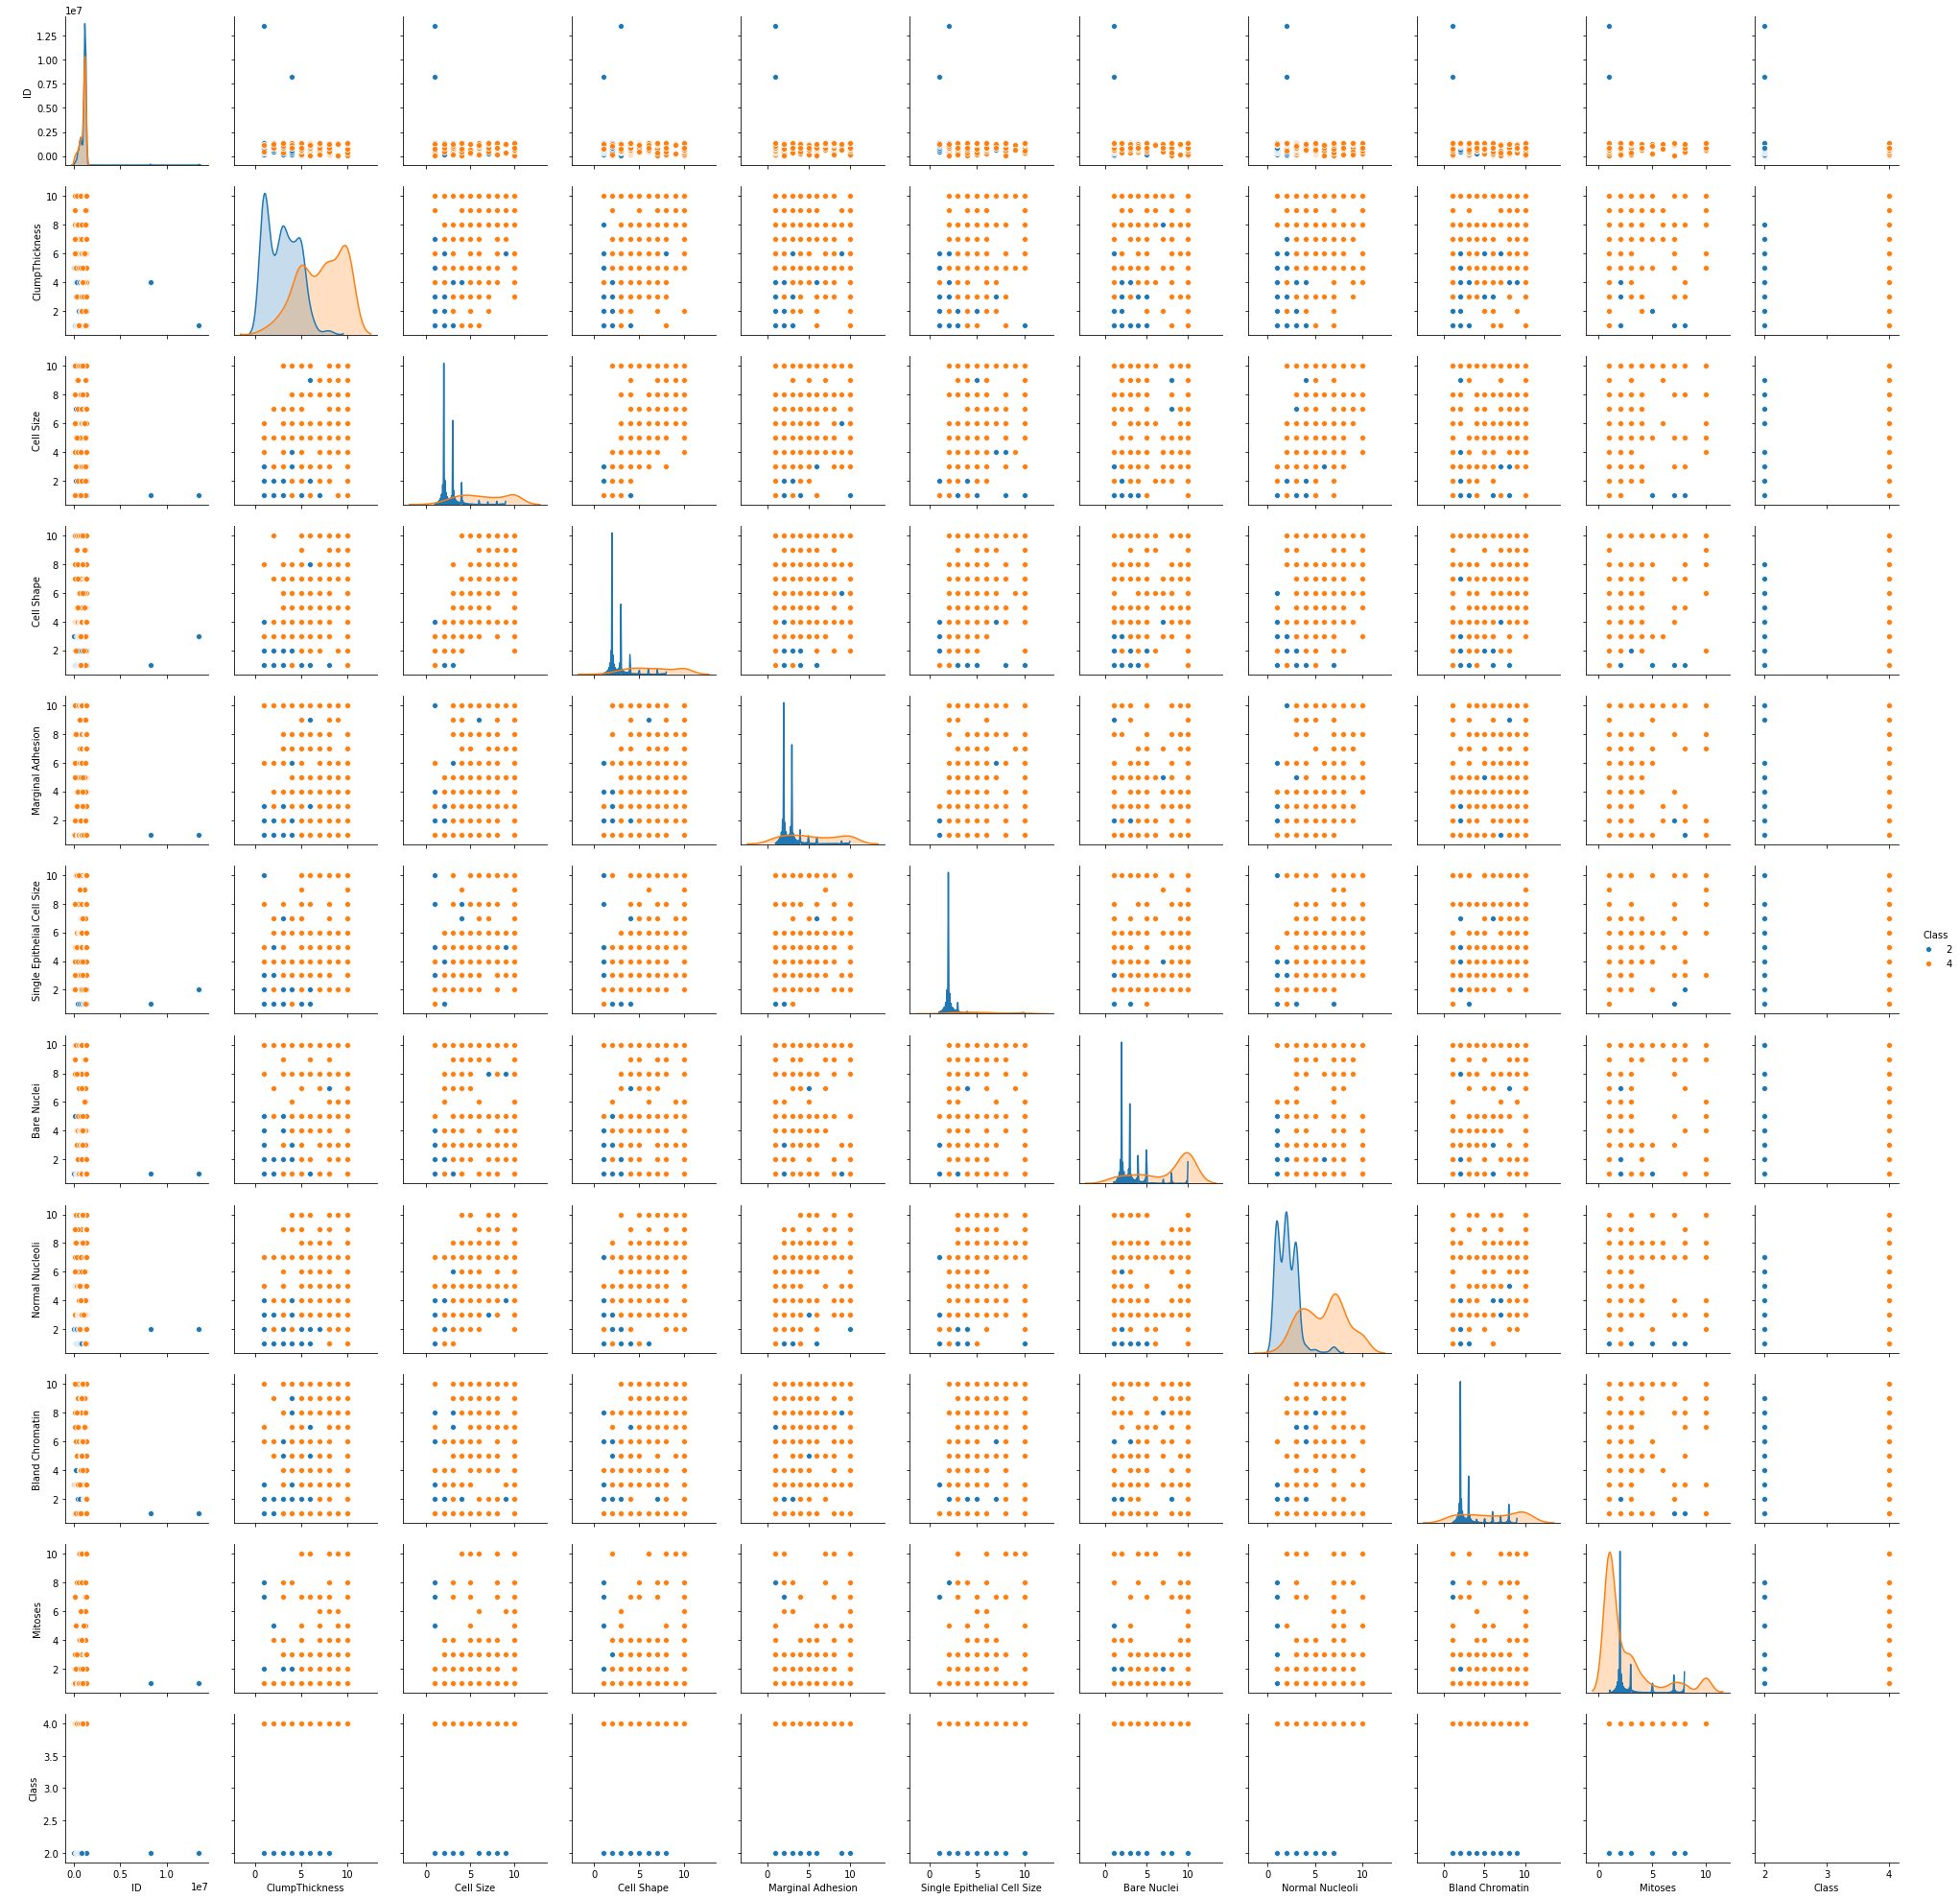

In [241]:
#Let us check for pair plots
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
sns.pairplot(df, diag_kind='kde',hue='Class')

In [242]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [243]:
df.drop(columns=["ID"],inplace=True)

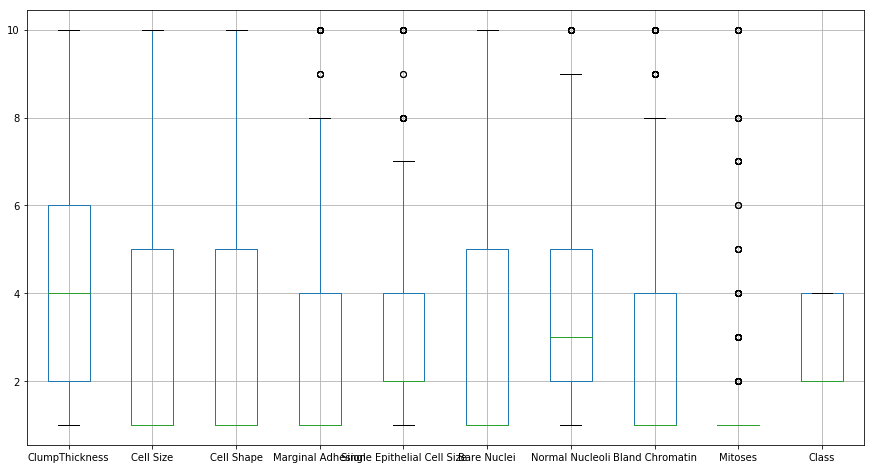

In [244]:
# We could see most of the outliers are now removed.
df.boxplot(figsize=(15,8))

In [245]:
pd.crosstab(df['Marginal Adhesion'],df["Class"])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [246]:
# Converting outlier to max value which is 8
df["Marginal Adhesion"]= df["Marginal Adhesion"].replace([9,10], 8) 

In [247]:
# Converting outlier to max value which is 7
df["Single Epithelial Cell Size"]= df["Single Epithelial Cell Size"].replace([8,9,10], 7)

In [248]:
# Converting outlier to max value which is 9
df["Normal Nucleoli"]= df["Normal Nucleoli"].replace([10], 9)

In [249]:
# Converting outlier to max value which is 8
df["Bland Chromatin"]= df["Bland Chromatin"].replace([9,10], 8)

In [250]:
# Converting outlier to max value which is 3
df["Mitoses"]= df["Mitoses"].replace([4,5,6,7,8,9,10], 3)

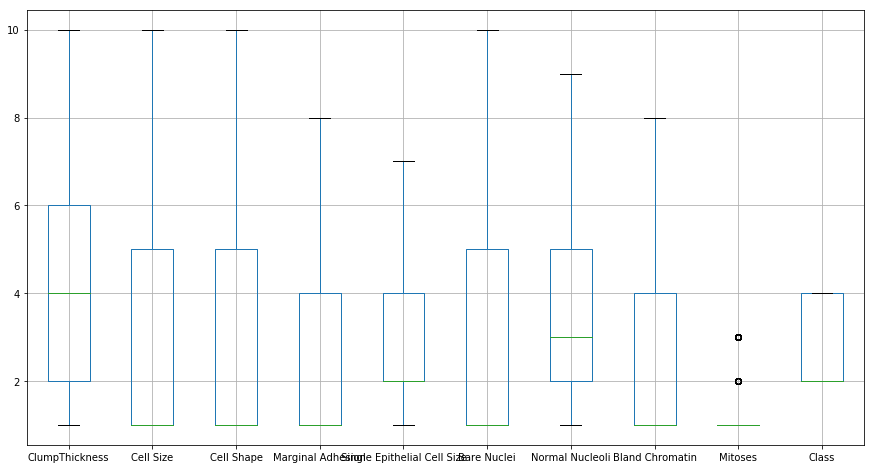

In [251]:
df.boxplot(figsize=(15,8))

In [252]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [253]:
X.shape

(690, 9)

In [254]:
y.shape

(690,)

In [255]:
# standardize the data
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [256]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.50566766 0.54660373 0.59150555
  0.56762194 0.54895554 0.42745595]
 [0.64410677 1.00145138 0.9066632  0.73190433 0.78174972 0.68556472
  0.76060761 0.7322064  0.51098944]
 [0.65453792 0.9066632  1.00145138 0.70664526 0.75160088 0.70518656
  0.73975369 0.72768806 0.48167882]
 [0.50566766 0.73190433 0.70664526 1.00145138 0.66784054 0.68919517
  0.68896322 0.6334195  0.46663504]
 [0.54660373 0.78174972 0.75160088 0.66784054 1.00145138 0.6263289
  0.66056222 0.68990315 0.50506262]
 [0.59150555 0.68556472 0.70518656 0.68919517 0.6263289  1.00145138
  0.68161737 0.60106392 0.45258904]
 [0.56762194 0.76060761 0.73975369 0.68896322 0.66056222 0.68161737
  1.00145138 0.6803516  0.40072557]
 [0.54895554 0.7322064  0.72768806 0.6334195  0.68990315 0.60106392
  0.6803516  1.00145138 0.49222483]
 [0.42745595 0.51098944 0.48167882 0.46663504 0.50506262 0.45258904
  0.40072557 0.49222483 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [257]:
# Step 2- Get eigen values and eigen vector

In [258]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
#e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ 0.29900577  0.00901248  0.88768587  0.00577712 -0.06270648 -0.20107528
   0.01672641  0.26600397 -0.08422288]
 [ 0.37392276 -0.09472824 -0.04129284  0.73937952 -0.21544792  0.35335818
   0.25414552 -0.15952785 -0.20372103]
 [ 0.36971722 -0.13236023  0.02790309 -0.65776995 -0.19527032  0.52715754
   0.22584073 -0.18502076 -0.10529844]
 [ 0.33578433 -0.09647501 -0.32530769 -0.05171556  0.43486323 -0.04321002
   0.15991118  0.67066276 -0.3211053 ]
 [ 0.3436967   0.02274748 -0.22523401 -0.07064328 -0.30962251 -0.57704167
   0.4922195  -0.05065393  0.38980156]
 [ 0.33173924 -0.11573316  0.09731735  0.08247488  0.6504913   0.14737892
  -0.08236389 -0.23771155  0.59340718]
 [ 0.3419587  -0.2772294  -0.09834649 -0.06575667  0.08846295 -0.43009503
  -0.41656402 -0.46757716 -0.45524799]
 [ 0.33625034  0.01368097 -0.17659601  0.02886343 -0.42660081  0.12307347
  -0.65735516  0.34677387  0.32438564]
 [ 0.25131054  0.93443232 -0.05143747 -0.03160883  0.11659586  0.01086789
  -0.062

# Q8 Find variance and cumulative variance by each eigen vector

Cumulative Variance Explained [ 67.61815316  75.18411519  81.1315324   86.10128108  89.83609156
  93.07067524  96.20675002  99.00615217 100.        ]


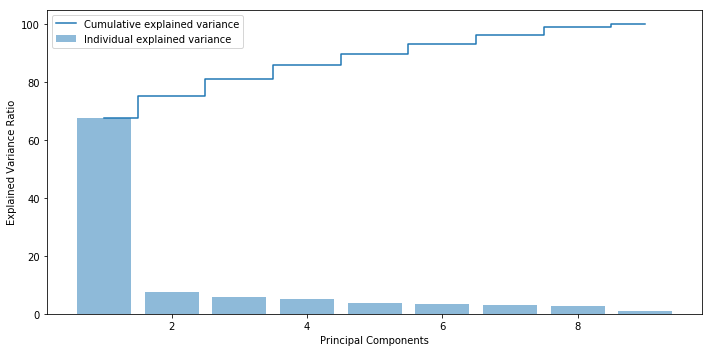

In [259]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [260]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 4 to 2)

pca = PCA(n_components=4)
data_reduced = pca.fit_transform(X_sd)
data_reduced.transpose()

array([[-1.51797334,  1.69375884, -1.63860389, ...,  4.1298656 ,
         2.2425105 ,  2.6587769 ],
       [-0.07278474, -0.67493571, -0.11120681, ...,  0.00903827,
        -1.39397461, -1.55194475],
       [-0.62547167,  0.37398688, -0.02178883, ...,  1.01119538,
         0.76277728,  0.84158908],
       [ 0.06421307, -0.80973201, -0.16030334, ...,  2.23410353,
         0.56240252,  0.18995177]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


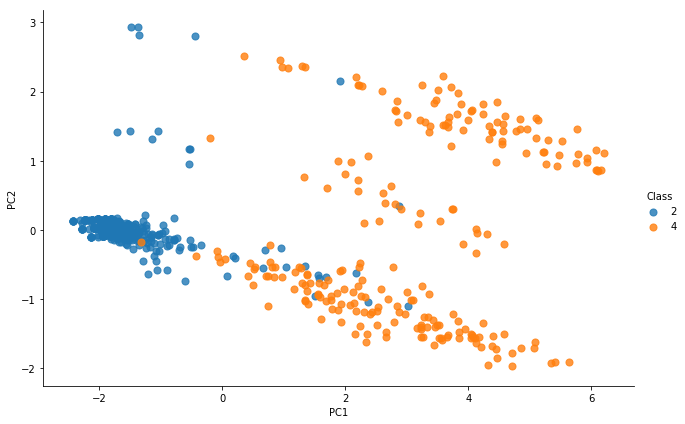

In [261]:
## Plot of PC
df["PC1"] = data_reduced[:,0]
df["PC2"] = data_reduced[:,1]
df["PC3"] = data_reduced[:,2]
df["PC4"] = data_reduced[:,3]
vis = sns.lmplot(data = df[["PC1","PC2","Class"]], x = "PC1", y = "PC2",fit_reg=False, hue = "Class",\
                 size = 6, aspect=1.5, scatter_kws = {'s':50}, )
vis.savefig("pca.png")

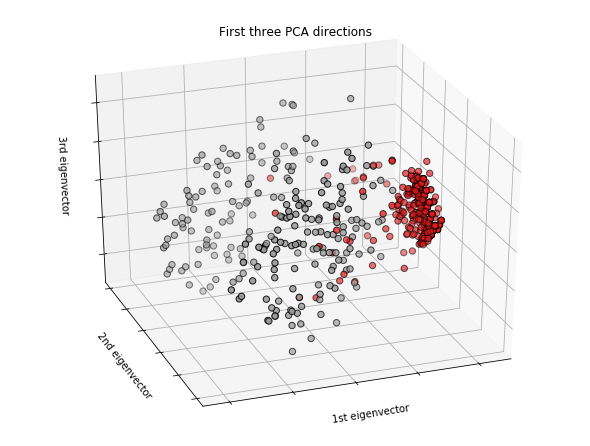

In [262]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X_sd)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [263]:
pca.components_

array([[ 0.29900577,  0.37392276,  0.36971722,  0.33578433,  0.3436967 ,
         0.33173924,  0.3419587 ,  0.33625034,  0.25131054],
       [ 0.00901248, -0.09472824, -0.13236023, -0.09647501,  0.02274748,
        -0.11573316, -0.2772294 ,  0.01368097,  0.93443232],
       [-0.88768587,  0.04129284, -0.02790309,  0.32530769,  0.22523401,
        -0.09731735,  0.09834649,  0.17659601,  0.05143747],
       [ 0.06270648,  0.21544792,  0.19527032, -0.43486323,  0.30962251,
        -0.6504913 , -0.08846295,  0.42660081, -0.11659586]])

# Q10 Find correlation between components and features

In [264]:
df.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,PC1,PC2,PC3,PC4
0,5,1,1,1,2,1,3,1,1,2,-1.517973,-0.072785,-0.625472,0.064213
1,5,4,4,5,7,10,3,2,1,2,1.693759,-0.674936,0.373987,-0.809732
2,3,1,1,1,2,2,3,1,1,2,-1.638604,-0.111207,-0.021789,-0.160303
3,6,8,8,1,3,4,3,7,1,2,1.559743,-0.652865,-0.462743,1.651729
4,4,1,1,3,2,1,3,1,1,2,-1.353030,-0.153891,-0.047478,-0.309217


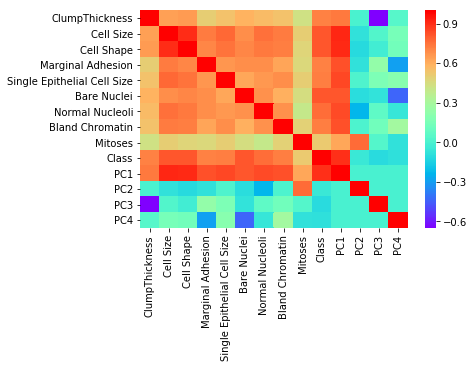

In [265]:
sns.heatmap(df.corr(),cmap='rainbow')

In [266]:
df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class,PC1,PC2,PC3,PC4
ClumpThickness,1.000000,0.643173,0.653589,0.504935,0.545812,0.590648,0.566799,0.548160,0.426836,0.716812,7.376196e-01,7.436995e-03,-6.494486e-01,4.193734e-02
Cell Size,0.643173,1.000000,0.905349,0.730844,0.780617,0.684571,0.759505,0.731145,0.510249,0.817586,9.224330e-01,-7.816869e-02,3.021066e-02,1.440890e-01
Cell Shape,0.653589,0.905349,1.000000,0.705621,0.750512,0.704165,0.738682,0.726633,0.480981,0.817551,9.120583e-01,-1.092222e-01,-2.041445e-02,1.305944e-01
Marginal Adhesion,0.504935,0.730844,0.705621,1.000000,0.666873,0.688196,0.687965,0.632501,0.465959,0.722249,8.283490e-01,-7.961010e-02,2.380016e-01,-2.908313e-01
Single Epithelial Cell Size,0.545812,0.780617,0.750512,0.666873,1.000000,0.625421,0.659605,0.688903,0.504331,0.726972,8.478681e-01,1.877096e-02,1.647857e-01,2.070718e-01
Bare Nuclei,0.590648,0.684571,0.704165,0.688196,0.625421,1.000000,0.680630,0.600193,0.451933,0.816655,8.183701e-01,-9.550171e-02,-7.119930e-02,-4.350408e-01
Normal Nucleoli,0.566799,0.759505,0.738682,0.687965,0.659605,0.680630,1.000000,0.679366,0.400145,0.763269,8.435806e-01,-2.287666e-01,7.195224e-02,-5.916296e-02
Bland Chromatin,0.548160,0.731145,0.726633,0.632501,0.688903,0.600193,0.679366,1.000000,0.491511,0.729245,8.294986e-01,1.128939e-02,1.292011e-01,2.853055e-01
Mitoses,0.426836,0.510249,0.480981,0.465959,0.504331,0.451933,0.400145,0.491511,1.000000,0.521933,6.199599e-01,7.710831e-01,3.763267e-02,-7.797791e-02
Class,0.716812,0.817586,0.817551,0.722249,0.726972,0.816655,0.763269,0.729245,0.521933,1.000000,9.011219e-01,-4.940503e-02,-1.031207e-01,-8.486971e-02


# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [267]:
jokes = pd.read_csv("C:\\Ishan\\Greatlearning\\Labs\\5. 1 Nov\\jokes.csv")

In [268]:
jokes.head(5)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [269]:
ratings=jokes.iloc[0:200,1:101]

In [270]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [271]:
ratings.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [272]:
ratings.columns=range(100)

In [273]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [274]:
ratings.replace(99, 0,inplace=True)

In [275]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [276]:
ratings_transpose=ratings.T

In [277]:
ratings_transpose.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,...,3.54,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58
1,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,...,-6.70,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28
2,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,...,-4.76,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56
3,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,...,0.00,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67
4,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,6.41,...,-8.16,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38


In [278]:
from sklearn.preprocessing import StandardScaler
ratings_diff = StandardScaler().fit_transform(ratings_transpose)

In [279]:
ratings_diff

array([[-0.92720712,  0.27457908, -0.7878666 , ...,  1.24899421,
        -0.30733439,  0.91467957],
       [ 1.98941099, -0.62510643, -0.7878666 , ..., -1.22567595,
        -0.30733439, -1.89065773],
       [-1.25030027,  0.74398021, -0.7878666 , ..., -0.2141883 ,
        -0.30733439, -1.29730489],
       ...,
       [ 0.44593879, -0.49540349, -0.7878666 , ..., -0.04432015,
        -0.30733439, -0.30256632],
       [ 0.44593879, -1.45479352, -0.7878666 , ...,  0.51933328,
        -0.30733439, -0.30256632],
       [ 0.44593879, -0.34511277, -0.7878666 , ...,  0.40737472,
        -0.30733439, -0.30256632]])

In [280]:
ratings_diff.shape

(100, 200)

In [281]:
ratingmean=ratings_diff.mean(axis=1)

In [282]:
ratingmean

array([-0.00750712, -0.04599906, -0.10707627, -0.32946024, -0.17790901,
        0.14416335, -0.14245948, -0.2529505 , -0.14446555,  0.07500963,
        0.12692589,  0.13623836, -0.49106203,  0.30513406, -0.57306865,
       -0.92386158, -0.49712044, -0.37160086, -0.11704844, -0.39704547,
        0.44163283,  0.07538555, -0.1050732 , -0.42382901, -0.02252966,
        0.08707342,  0.60972362,  0.10289024,  0.6642304 , -0.35885747,
        0.50249102,  0.52189075, -0.19274273,  0.07743073,  0.69230389,
        0.75197178, -0.29936982,  0.0751037 ,  0.05124105, -0.01323282,
       -0.21815835,  0.37486252, -0.29597156, -0.45711105, -0.03619337,
        0.31489334,  0.17736473,  0.18280502,  0.5320071 ,  0.87821678,
       -0.22012481, -0.02494807,  0.73670016,  0.31614636,  0.05310318,
        0.41407327, -0.39348134, -0.7217115 , -0.19241029, -0.16650425,
        0.39273193,  0.55754984, -0.08241105, -0.37911416,  0.49532245,
        0.39250225, -0.19756691,  0.40890015,  0.47513885, -0.06

In [283]:
ratingmean.shape

(100,)

In [284]:
ratings_transpose["ratingmean"]=ratingmean

In [285]:
ratings_transpose.head(5)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,ratingmean
0,-7.82,4.08,0.00,0.00,8.50,-6.17,0.00,6.84,-3.79,3.01,...,4.47,8.06,1.84,-9.71,5.73,1.80,2.62,0.00,5.58,-0.007507
1,8.79,-0.29,0.00,8.35,4.61,-3.54,0.00,3.16,-3.54,5.15,...,-0.19,3.45,-2.23,-8.25,0.00,5.39,-3.79,0.00,-7.28,-0.045999
2,-9.66,6.36,0.00,0.00,-4.17,0.44,0.00,9.17,-9.42,5.15,...,1.55,3.69,5.49,-8.30,-0.58,8.06,-1.17,0.00,-4.56,-0.107076
3,-8.16,4.37,0.00,0.00,-5.39,-8.50,0.00,-6.21,-6.89,3.01,...,-1.50,-1.36,5.49,-2.62,1.75,-0.10,-0.44,0.00,2.67,-0.329460
4,-7.52,-2.38,9.03,1.80,1.36,-7.09,8.59,-8.16,-8.74,6.41,...,-4.42,3.93,4.37,-8.93,2.86,4.81,-1.02,7.91,7.38,-0.177909


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [286]:
ratings_transpose["ratingmean"].sort_values(ascending=False).head(10)

49    0.878217
35    0.751972
52    0.736700
34    0.692304
28    0.664230
26    0.609724
61    0.557550
48    0.532007
31    0.521891
30    0.502491
Name: ratingmean, dtype: float64